# Scikit-Learn Classification Model - Supervised Learning

#### Data: Tourism Nova Scotia
#### Time: 2006 to 2024
#### Data Source: https://data.novascotia.ca/Business-and-Industry/Tourism-Nova-Scotia-Visitation/n783-4gmh/about_data 

## Y-data Profile

#### Web page Link: https://sdivyaanisetty.github.io/ydata_profiles/ydata_profile_tourism_NovaScotia.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

### Import Data

In [2]:
df = pd.read_csv('../../data/Tourism_Nova_Scotia_Visitation_20250202_UPDATED.csv')
df.head()

,Mode of entry,Month/Year,Visitor Origin,Country,Number of Visitors (Rounded to nearest hundred)
0,Air,January 2006,Atlantic Canada,Canada,5400.0
1,Air,January 2006,Quebec,Canada,3400.0
2,Air,January 2006,Ontario,Canada,16600.0
3,Air,January 2006,Western Canada,Canada,7000.0
4,Air,January 2006,New England (inc Maine),United States,800.0


### Data Dictionary

 - **Mode of entry** - Visitor entered Nova Scotia by what mode [Air, Road].
 - **Month/Year** - The date of visitor entry.
 - **Visitor Origin** - Which City or Province are the visitor originally from.
 - **Country** - Which country are the Visitor originally from.
 - **Number of Visitors (Rounded to nearest hundred)** - Count of visitors

### Exploratory Data Analysis [EDA]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Mode of entry                                    7182 non-null   object 
 1   Month/Year                                       7182 non-null   object 
 2   Visitor Origin                                   7182 non-null   object 
 3   Country                                          7182 non-null   object 
 4   Number of Visitors (Rounded to nearest hundred)  6282 non-null   float64
dtypes: float64(1), object(4)
memory usage: 280.7+ KB


In [4]:
# Checking for nulls or missing records in the data 

df.isna().sum()

Mode of entry                                        0
Month/Year                                           0
Visitor Origin                                       0
Country                                              0
Number of Visitors (Rounded to nearest hundred)    900
dtype: int64

### Impute or delete any data as required

In [5]:
# drop the rows will null or missing records 

df = df.dropna(axis= 0, how= 'any')

In [6]:
# re-check for null or missing records 

df.isna().sum()

Mode of entry                                      0
Month/Year                                         0
Visitor Origin                                     0
Country                                            0
Number of Visitors (Rounded to nearest hundred)    0
dtype: int64

In [7]:
df.columns

Index(['Mode of entry', 'Month/Year', 'Visitor Origin', 'Country',
       'Number of Visitors (Rounded to nearest hundred)'],
      dtype='object')

### Convert the data type

In [8]:
# Converting 'object' type to 'category' type

df['Mode of entry'] = df['Mode of entry'].astype('category')
df['Month/Year'] = df['Month/Year'].astype('category')
df['Visitor Origin'] = df['Visitor Origin'].astype('category')
df['Country'] = df['Country'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7181
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Mode of entry                                    6282 non-null   category
 1   Month/Year                                       6282 non-null   category
 2   Visitor Origin                                   6282 non-null   category
 3   Country                                          6282 non-null   category
 4   Number of Visitors (Rounded to nearest hundred)  6282 non-null   float64 
dtypes: category(4), float64(1)
memory usage: 140.2 KB


## EDA Visualizations

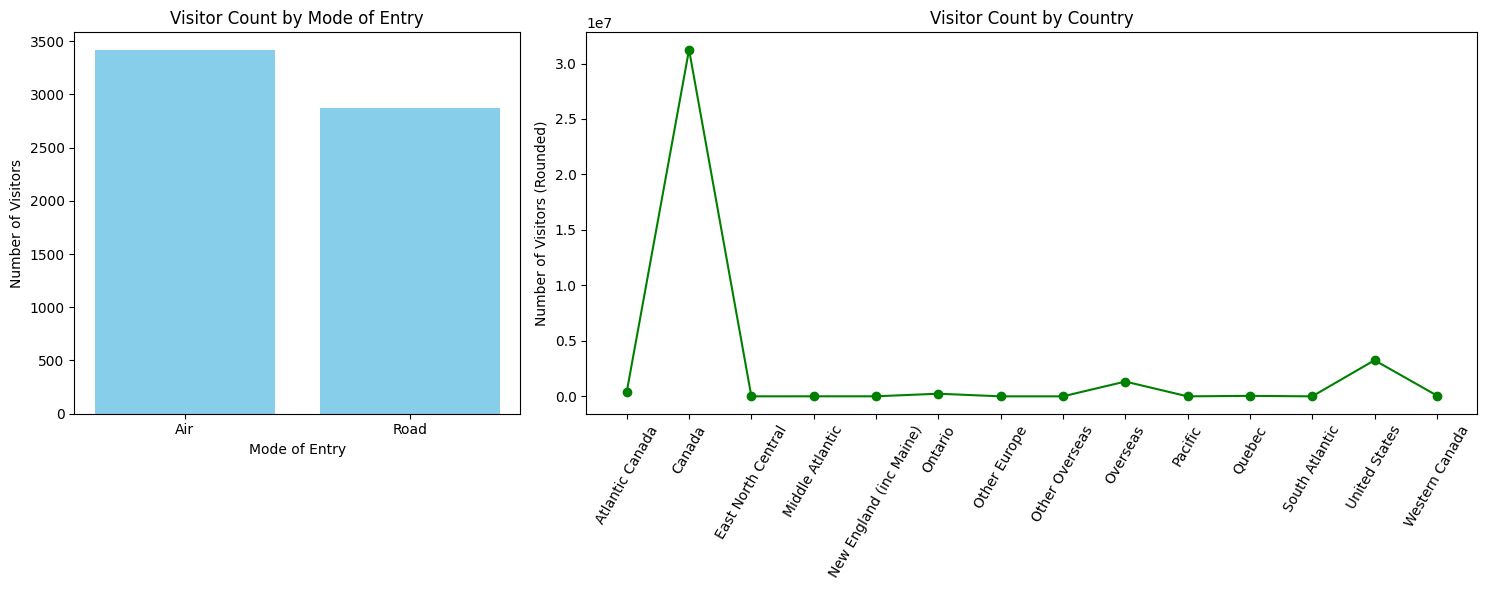

In [9]:
# Prepare data for the bar chart
mode_counts = df['Mode of entry'].value_counts()  # Count of each mode of entry

# Prepare data for the line chart
country_data = df.groupby('Country', observed= True)['Number of Visitors (Rounded to nearest hundred)'].sum()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 2]}) # Bar chart narrower, Line chart wider

# Bar Chart: Mode of Entry Counts
axes[0].bar(mode_counts.index, mode_counts.values, color='skyblue')
axes[0].set_title("Visitor Count by Mode of Entry")
axes[0].set_xlabel("Mode of Entry")
axes[0].set_ylabel("Number of Visitors")

# Line Chart: Trend of Visitors by Country
axes[1].plot(country_data.index, country_data.values, marker='o', linestyle='-', color='green')
axes[1].set_title("Visitor Count by Country")
axes[1].set_ylabel("Number of Visitors (Rounded)")
axes[1].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Prepare the X and y data

- Use one hot encoding for any object or categorical features
- Standardize / Normalize any numeric features

In [10]:
X = df.drop(columns=['Mode of entry'])
y = df['Mode of entry']

In [11]:
# one-hot encoding 
X = pd.get_dummies(X, drop_first=True)
X.head()

,Number of Visitors (Rounded to nearest hundred),Month/Year_April 2007,Month/Year_April 2008,Month/Year_April 2009,Month/Year_April 2010,Month/Year_April 2011,Month/Year_April 2012,Month/Year_April 2013,Month/Year_April 2014,Month/Year_April 2015,...,Country_New England (inc Maine),Country_Ontario,Country_Other Europe,Country_Other Overseas,Country_Overseas,Country_Pacific,Country_Quebec,Country_South Atlantic,Country_United States,Country_Western Canada
0,5400.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3400.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,16600.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7000.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,800.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
# Scale the data after spliting for Train / Test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

scaler = StandardScaler()
scaler.fit(X_train) 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Apply SMOTE to resample
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [14]:
X_train.shape, len(X_train_res)

((4397, 256), 4770)

In [15]:
y_train.value_counts()

Mode of entry
Air     2385
Road    2012
Name: count, dtype: int64

In [16]:
y_train_res.value_counts()

Mode of entry
Air     2385
Road    2385
Name: count, dtype: int64

## Create the Model

In [17]:
#mdl_selected

mdl_selected = 'CatBoost Classifier'

In [18]:
mdl = CatBoostClassifier(iterations= 1000)
mdl

In [19]:
mdl.fit(X_train, y_train)

Learning rate set to 0.019389
0:	learn: 0.6834973	total: 161ms	remaining: 2m 41s
1:	learn: 0.6744760	total: 178ms	remaining: 1m 28s
2:	learn: 0.6668957	total: 194ms	remaining: 1m 4s
3:	learn: 0.6577851	total: 211ms	remaining: 52.4s
4:	learn: 0.6497354	total: 223ms	remaining: 44.4s
5:	learn: 0.6417920	total: 236ms	remaining: 39s
6:	learn: 0.6347834	total: 248ms	remaining: 35.1s
7:	learn: 0.6273663	total: 261ms	remaining: 32.3s
8:	learn: 0.6168228	total: 274ms	remaining: 30.1s
9:	learn: 0.6093873	total: 287ms	remaining: 28.4s
10:	learn: 0.6007302	total: 299ms	remaining: 26.9s
11:	learn: 0.5961442	total: 315ms	remaining: 25.9s
12:	learn: 0.5886718	total: 327ms	remaining: 24.8s
13:	learn: 0.5818438	total: 339ms	remaining: 23.9s
14:	learn: 0.5781974	total: 353ms	remaining: 23.2s
15:	learn: 0.5710957	total: 366ms	remaining: 22.5s
16:	learn: 0.5674899	total: 378ms	remaining: 21.9s
17:	learn: 0.5643642	total: 394ms	remaining: 21.5s
18:	learn: 0.5613953	total: 409ms	remaining: 21.1s
19:	learn: 

## Predict y-hat

In [20]:
y_pred = mdl.predict(X_test)

## Probability

In [21]:
# probability scores... 
# I do this first as it's kinda my "thing" - many don't use probability scoring in their pipelines
y_proba = mdl.predict_proba(X_test)

# bring in just the probability of y_pred
res = pd.DataFrame({'y_true':y_test, 
              'y_pred':y_pred, 
              'proba': [max(proba) for proba in y_proba]
              })
res['match'] = np.where(res['y_true'] == res['y_pred'], 1, 0)

# report the "misses"
misses = res[res['match'] == 0]
miss_count = len(misses)

In [22]:
print(f'There are {miss_count} misses vs {len(y_test)} total.\n% Total Missed: {miss_count / len(y_test) * 100:.3f}%')

There are 377 misses vs 1885 total.
% Total Missed: 20.000%


In [23]:
misses.sort_values('proba', ascending = False).head()

,y_true,y_pred,proba,match
5397,Road,Air,0.970596,0
5753,Air,Road,0.930659,0
5411,Air,Road,0.918825,0
6193,Air,Road,0.916729,0
5684,Air,Road,0.913995,0


## Metrics for Classification

### Accuracy
The ratio of correctly predicted instances to the total instances.

In [24]:
# assigning y_test to variable y_true to help with clarity while learning...
y_true = y_test
y_pred = mdl.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f"The accuracy of the {mdl_selected} model: {accuracy:.2f}\nUnformated Value: {accuracy}")

The accuracy of the CatBoost Classifier model: 0.80
Unformated Value: 0.8


### Precision
The ratio of correctly predicted positive observations to the total predicted positives.

In [25]:
precision = precision_score(y_true, y_pred, average='weighted')
print(f"The precision of the {mdl_selected} model: {precision:.2f}\nUnformated Value: {precision}")

The precision of the CatBoost Classifier model: 0.80
Unformated Value: 0.8047575666766558


### Recall (Sensitivity)
The ratio of correctly predicted positive observations to all observations in the actual class.

In [26]:
recall = recall_score(y_true, y_pred, average='weighted')  # weighted
print(f"The recall of the {mdl_selected} model: {recall:.2f}\nUnformated Value: {recall}")

The recall of the CatBoost Classifier model: 0.80
Unformated Value: 0.8


### F1 Score 
The weighted average of Precision and Recall.


In [27]:
f1 = f1_score(y_true, y_pred, average='weighted') # weighted

print(f"The f1 of the {mdl_selected} model: {f1:.2f}\nUnformated Value: {recall}")

The f1 of the CatBoost Classifier model: 0.80
Unformated Value: 0.8


### Classification Report
A comprehensive report showing precision, recall, F1 score, and support for each class.

In [28]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

         Air       0.78      0.89      0.83      1028
        Road       0.84      0.69      0.76       857

    accuracy                           0.80      1885
   macro avg       0.81      0.79      0.79      1885
weighted avg       0.80      0.80      0.80      1885



### Confusion Matrix
A table used to describe the performance of a classification model.

In [29]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[913, 115],
       [262, 595]], dtype=int64)

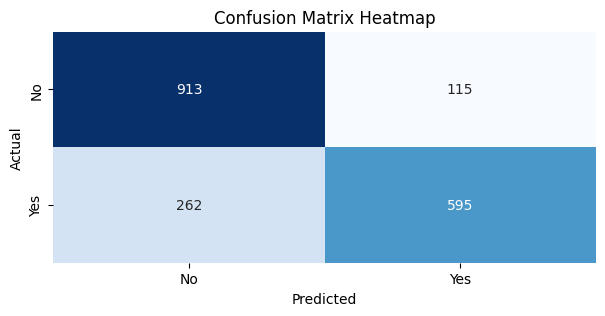

In [30]:
class_labels = ['No', 'Yes']

plt.figure(figsize=(7, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()